<header align="center">
  <h1>* T-MAJ *</h1>
  <h1>~ Voltron ~</h1>
  <p>
    <i>Alexandre.D | Alexandre.P | Bastien.F</i>
  </p>
  <img src="https://images.unsplash.com/photo-1499346030926-9a72daac6c63?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80" alt="air img"/>
  <h2>Daily climate time series analysis</h2>
</header>

# Setup

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.ensemble import IsolationForest

import helpers

## Constants

In [2]:
TRAIN_SIZE = 0.8
VAL_SIZE = 0.1
TEST_SIZE = 0.1
EPOCHS = 100
BATCH_SIZE = 128
SEED = 5

## Load data

In [3]:
# Parse dates and set date column to index
train_df = pd.read_csv("./data/DailyDelhiClimateTrain.csv",
                       parse_dates=["date"],
                       index_col=["date"])
test_df = pd.read_csv("./data/DailyDelhiClimateTest.csv",
                      parse_dates=["date"],
                      index_col=["date"])
print(f"Initial train size: {train_df.shape[0]}")
print(f"Initial test size: {test_df.shape[0]}")
print(f"Initial ratio: {(test_df.shape[0] / train_df.shape[0]):.2f}")

Initial train size: 1462
Initial test size: 114
Initial ratio: 0.08


In [4]:
df = pd.concat([train_df, test_df])
train_df = df.iloc[:int((1 - TEST_SIZE) * df.shape[0])]
test_df = df.iloc[int((1 - TEST_SIZE) * df.shape[0]):]
print(f"Updated train size: {train_df.shape[0]}")
print(f"Updated test size: {test_df.shape[0]}")
print(f"Updated ratio: {(test_df.shape[0] / train_df.shape[0]):.2f}")

Updated train size: 1418
Updated test size: 158
Updated ratio: 0.11


# EDA

## Plot values

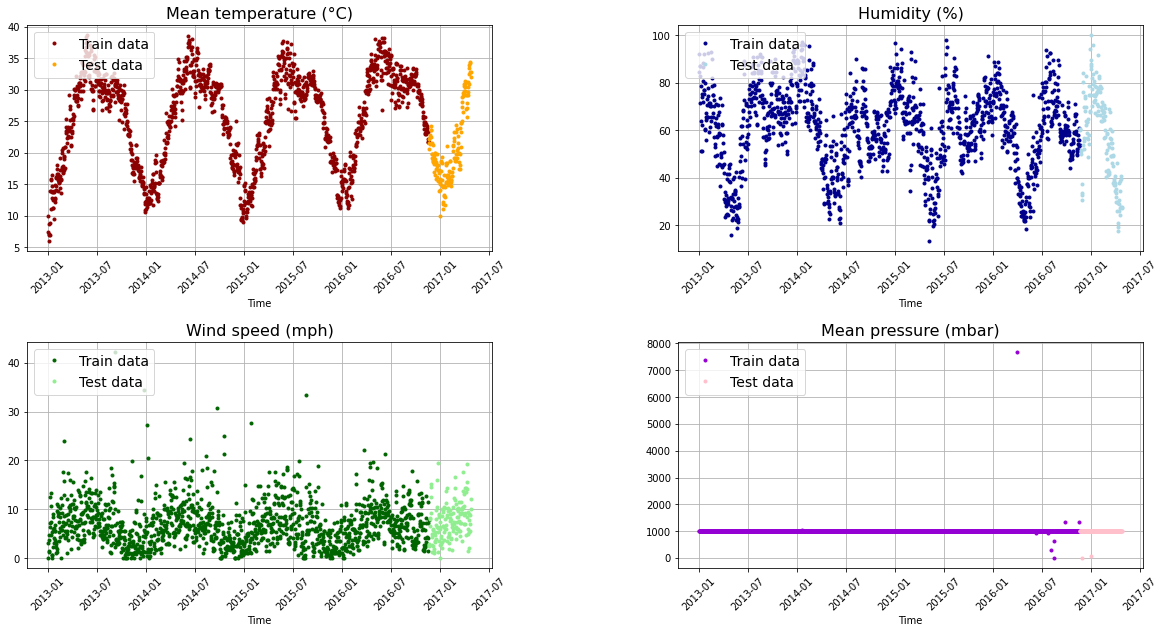

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,
                                             2,
                                             figsize=(20, 10),
                                             gridspec_kw={
                                                 'wspace': .4,
                                                 'hspace': .4
                                             })

helpers.plot_time_series(ax1,
                         train_df.index,
                         train_df["meantemp"],
                         "Mean temperature (°C)",
                         label='Train data',
                         c='darkred')
helpers.plot_time_series(ax1,
                         test_df.index,
                         test_df["meantemp"],
                         "Mean temperature (°C)",
                         label='Test data',
                         c='orange')
helpers.plot_time_series(ax2,
                         train_df.index,
                         train_df["humidity"],
                         "Humidity (%)",
                         label='Train data',
                         c='darkblue')
helpers.plot_time_series(ax2,
                         test_df.index,
                         test_df["humidity"],
                         "Humidity (%)",
                         label='Test data',
                         c='lightblue')
helpers.plot_time_series(ax3,
                         train_df.index,
                         train_df["wind_speed"],
                         "Wind speed (mph)",
                         label='Train data',
                         c='darkgreen')
helpers.plot_time_series(ax3,
                         test_df.index,
                         test_df["wind_speed"],
                         "Wind speed (mph)",
                         label='Test data',
                         c='lightgreen')
helpers.plot_time_series(ax4,
                         train_df.index,
                         train_df["meanpressure"],
                         "Mean pressure (mbar)",
                         label='Train data',
                         c='darkviolet')
helpers.plot_time_series(ax4,
                         test_df.index,
                         test_df["meanpressure"],
                         "Mean pressure (mbar)",
                         label='Test data',
                         c='pink')

# fig.savefig('./graphs/train_plus_test_data.png', facecolor='white')

## Remove outliers

In [6]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1010.593178
std,7.345014,16.979994,4.510725,175.242704
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.750000,3.700000,1001.875000
50%,27.166667,62.440476,6.363571,1009.055556
75%,31.142857,72.125000,9.262500,1015.200000
max,38.714286,100.000000,42.220000,7679.333333


In [7]:
clf = IsolationForest(contamination=6e-3, random_state=SEED)
clf.fit(df['meanpressure'].to_numpy().reshape(-1,1))
outliers = clf.predict(df['meanpressure'].to_numpy().reshape(-1,1)) == -1

In [8]:
df['meanpressure'].replace(to_replace=df['meanpressure'][outliers].to_numpy(),
                           value=df['meanpressure'].mean(),
                           inplace=True)


In [9]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1008.579832
std,7.345014,16.979994,4.510725,7.381090
min,6.000000,13.428571,0.000000,991.375000
25%,18.500000,49.750000,3.700000,1002.000000
50%,27.166667,62.440476,6.363571,1009.171429
75%,31.142857,72.125000,9.262500,1015.145604
max,38.714286,100.000000,42.220000,1023.000000


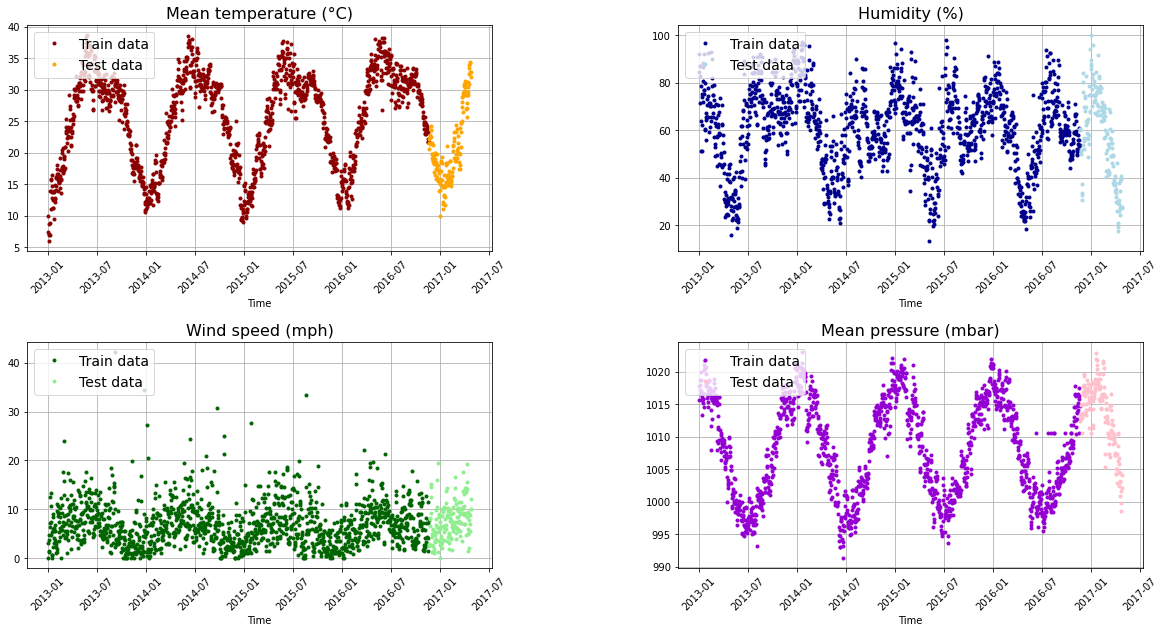

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,
                                             2,
                                             figsize=(20, 10),
                                             gridspec_kw={
                                                 'wspace': .4,
                                                 'hspace': .4
                                             })

helpers.plot_time_series(ax1,
                         train_df.index,
                         train_df["meantemp"],
                         "Mean temperature (°C)",
                         label='Train data',
                         c='darkred')
helpers.plot_time_series(ax1,
                         test_df.index,
                         test_df["meantemp"],
                         "Mean temperature (°C)",
                         label='Test data',
                         c='orange')
helpers.plot_time_series(ax2,
                         train_df.index,
                         train_df["humidity"],
                         "Humidity (%)",
                         label='Train data',
                         c='darkblue')
helpers.plot_time_series(ax2,
                         test_df.index,
                         test_df["humidity"],
                         "Humidity (%)",
                         label='Test data',
                         c='lightblue')
helpers.plot_time_series(ax3,
                         train_df.index,
                         train_df["wind_speed"],
                         "Wind speed (mph)",
                         label='Train data',
                         c='darkgreen')
helpers.plot_time_series(ax3,
                         test_df.index,
                         test_df["wind_speed"],
                         "Wind speed (mph)",
                         label='Test data',
                         c='lightgreen')
helpers.plot_time_series(ax4,
                         train_df.index,
                         train_df["meanpressure"],
                         "Mean pressure (mbar)",
                         label='Train data',
                         c='darkviolet')
helpers.plot_time_series(ax4,
                         test_df.index,
                         test_df["meanpressure"],
                         "Mean pressure (mbar)",
                         label='Test data',
                         c='pink')

# fig.savefig('./graphs/train_plus_test_data_fixed.png', facecolor='white')

## Correlation matrix

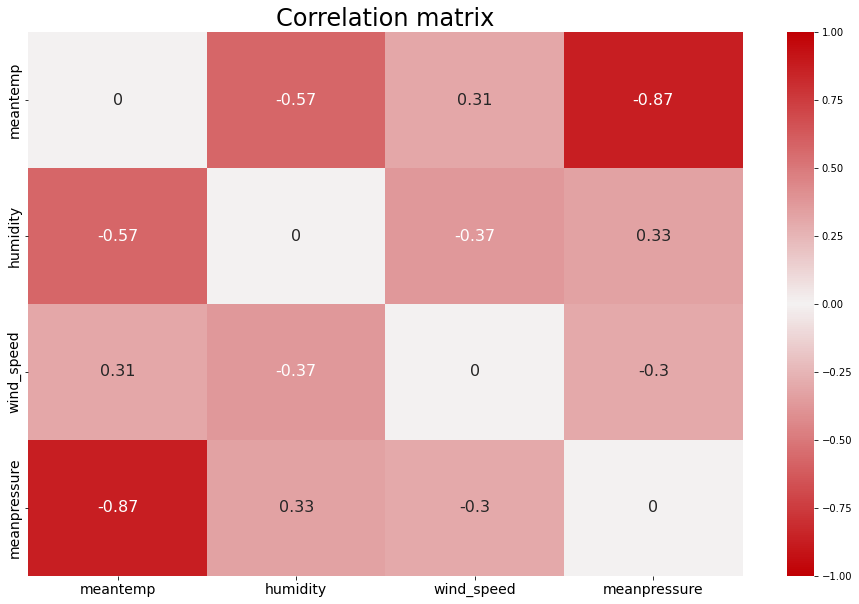

In [38]:
fig, ax = plt.subplots(figsize=(16, 10))
corr_mat = train_df.corr().replace(to_replace=1.0, value=0)
cmap = sns.diverging_palette(12, 12, s=100, l=40, as_cmap=True)
sns.heatmap(ax=ax,
            data=corr_mat,
            annot=True,
            center=0,
            vmin=-1,
            vmax=1,
            cmap=cmap,
            annot_kws={'size': 16})
ax.set_xticklabels(corr_mat.columns, size=14)
ax.set_yticklabels(corr_mat.columns, size=14)
ax.set_title("Correlation matrix", fontsize=24)

# fig.savefig('./graphs/correlation_matrix.png', facecolor='white')